TP 3 : Plongements lexicaux et réécriture de textes
====

1 - Introduction 
------

Dans ce TP, nous aborderons les plongements lexicaux à travers la bibliothèque Gensim et nous verrons comment réécrire des textes dans le cadre du projet d'écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

N'hésitez pas à regarder régulièrement la documentation des librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- Gensim : https://radimrehurek.com/gensim/apiref.html
- Scikit-learn : https://scikit-learn.org/stable/


Installation des librairies si nécessaire.

In [ ]:
## Realiser par : MESSILI Islem
## Numuro Etudiant = 22303045
## Email: messiliislem@gmail.com

In [1]:
!pip install --upgrade gensim
!pip install --upgrade scikit-learn
!pip install pandas
!pip install numpy==1.24.0
!pip install --user spacy
!pip install --user nltk
!pip install --user wordcloud
!python3 -m spacy download en_core_web_lg
!python3 -m spacy download fr_core_news_sm
!pip install --upgrade pip 
!pip install --upgrade Pillow
!pip install translate 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 63.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 15.6 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 57.9 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 67.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Consider adding this directory to PA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 118.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 103.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 13.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.3 MB/s eta 0:00:00 MB/s eta 0:00:0101
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 6.2 MB/s eta 0:00:004.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 78.0 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.9 MB/s eta 0:00:00 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00m eta 0:00:010:01
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible rep

DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Import des librairies.

In [1]:
import gensim
from gensim import corpora
import gensim.downloader as api
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from nltk.corpus import stopwords
import nltk
from pprint import pprint

Charger un modèle du langage. Attention les modèles peuvent être assez lourds et leur chargement peut prendre un certain temps. Tous les modèles sont accessibles [ICI](https://github.com/RaRe-Technologies/gensim-data). 

In [2]:
# pour GloVe
wv = api.load('glove-wiki-gigaword-300')


# pour FastText
# wv = api.load('fasttext-wiki-news-subwords-300')

# pour ConceptNet Numberbatch
# wv = api.load('conceptnet-numberbatch-17-06-300')

# pour Word2vec
##wv = api.load('word2vec-google-news-300')

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 62.6/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.1% 101.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.7% 141.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.7% 183.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.6% 224.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.5% 265.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.0% 312.1/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.1% 354.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2 - Analyser les plongements lexicaux 
------

Identifier la taille du plongement. Le nombre de lignes correspond au nombre de mots répertoriés dans le plogement et le nombre de colonnnes correspond au nombre de dimensions latentes de la représentation vectorielle.

In [11]:
wv.vectors.shape

(400000, 300)

Accéder au vecteur d'un mot donné.

In [12]:
wv['cat'].shape

(300,)

Calculer la similarité cosinus entre deux mots à partir des représentations vectorielles.

In [13]:
from numpy.linalg import norm
def cosine_similarity(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))
cosine_similarity(wv['cat'], wv['dog'])

0.68167466

[Q1] Définir la distance euclidienne entre deux mots à partir des représentations vectorielles.

In [14]:
from numpy.linalg import norm
def euclidien_distance(A, B):
    return norm(A - B)
euclidien_distance(wv['cat'], wv['dog'])

5.1959047

[Q2] Trouver la méthode qui implémente le cosinus dans Gensim, et montrer les résultats pour les paires de mots suivantes: (football, soccer), (football, elephant), (good, bad), (black, white), (yesterday,tomorrow). Quelles sont vos remarques?

In [15]:
##wv.most_similar("football", topn= 1)
wv.similarity("football","soccer")
wv.similarity("yesterday","tomorrow")

0.5682692

[Q3] Comment relier la fonction wv.distance() à la fonction wv.similarity()?

In [16]:
print(wv.distance("yesterday","tomorrow"))
print(wv.similarity("yesterday","tomorrow"))

0.43173080682754517
0.5682692


Trouver les K plus proches voisins d'un mot dans le plongement lexical.

In [17]:
K=5
wv.most_similar(positive=['cup'], topn=K)

[('cups', 0.6957379579544067),
 ('champions', 0.6520988941192627),
 ('finals', 0.6479452848434448),
 ('tournament', 0.6046193838119507),
 ('championship', 0.6013892292976379)]

[Q4] Ecrire la fonction qui calcule les K plus proches voisins d'un mot de référence sans recourir à la méthode wv.most_similar(). Vous devrez calculer le cosinus du mot de référence avec tous les mots du modèle qui se trouvent dans wv.vectors.

In [18]:
from numpy.linalg import norm

def cosine_similarity(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))

mot = "cat"
cos = []

for word in wv.index_to_key:
    similarity = cosine_similarity(wv[mot],wv[word])
    cos.append([word,similarity])
cos.sort(key=lambda x: x[1],reverse=True)
pprint(cos[0:5])


[['cat', 1.0],
 ['dog', 0.68167466],
 ['cats', 0.6815836],
 ['pet', 0.58703655],
 ['dogs', 0.5407667]]


Trouver l'inconnu. Etant donnée une liste de mots, la méthode wv.doesnt_match() trouve le mot le moins similaire à tous les autres dans la liste.

In [19]:
wv.doesnt_match(['cat', 'dog', 'mouse', 'airplane', 'bird', 'turtle'])

'airplane'

3 - Comprendre l'analogie dans les plongements lexicaux 
------

La particularité des plongements lexicaux est leur régularité. Il est donc possible d'exprimer des relations lexicales à partir d'opérations sur les vecteurs. Par exemple, la relation entre man et king est la même que celle entre woman et queen, qui peut être exprimée de la façon suivante: man - king = woman - queen. Ainsi, il suffit de remplacer un des mots par une variable pour comprendre la capacité du modèle à encoder la sémantique lexicale: i.e., x = king - man + woman.

In [13]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624816894531),
 ('throne', 0.5386103987693787),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.49802514910697937),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473270654678345)]

[Q5] Tester plusieurs analogies pour trouver la capitale de la Bulgarie, la marque de luxe de Nissan et le prétérite du verbe carry.

In [19]:
## France - Paris = Bulgarie - X
print(wv.most_similar(positive=['bulgaria', 'paris'], negative=['france']))
## Car - Toyota = Car - X
print(wv.most_similar(positive=['toyota', 'car'], negative=['car']))

[('sofia', 0.6212217211723328), ('bulgarian', 0.5522539615631104), ('istanbul', 0.5442202091217041), ('bucharest', 0.5396989583969116), ('budapest', 0.5186565518379211), ('moscow', 0.5085012912750244), ('athens', 0.4979740083217621), ('prague', 0.4952011704444885), ('vienna', 0.4833555221557617), ('helsinki', 0.480055034160614)]
[('honda', 0.7437493801116943), ('nissan', 0.6815258860588074), ('automaker', 0.6738415956497192), ('camry', 0.653520941734314), ('prius', 0.6512324213981628), ('mazda', 0.6306131482124329), ('lexus', 0.6107583045959473), ('motor', 0.6046668291091919), ('automakers', 0.597325325012207), ('ford', 0.5884994268417358)]


3 - Analyser les biais dans les plongements lexicaux 
------

Étant donné que les plongements lexicaux sont formés à partir de textes produits par des humains, ils présentent inévitablement certains biais propres à la population humaine en général. Un exemple est le biais de genre dans le domaine professionnel. Par exemple, les plongements montrent que certaines professions sont considérées comme étant principalement masculines ou féminines. Les autres préjugés que peuvent avoir les plongements sont liés à la race, la nationalité, l'âge, la religion, etc. Ainsi, lorsque vous construisez vos applications en TAL, vous devez toujours prendre en compte le biais que les plongements contiennent car ceux-ci seront également transférés dans votre modèle.


Trouver le penchant féminin de doctor.

In [20]:
pprint(wv.most_similar_cosmul(positive=['she', 'doctor'], negative=['he']))

[('nurse', 0.9194773435592651),
 ('woman', 0.8524463772773743),
 ('her', 0.8486989736557007),
 ('mother', 0.8447303771972656),
 ('pregnant', 0.8356964588165283),
 ('doctors', 0.8306604027748108),
 ('dentist', 0.8206111192703247),
 ('sister', 0.8120761513710022),
 ('physician', 0.810595691204071),
 ('nurses', 0.8073124289512634)]


[Q6] Comment pourriez-vous définir de façon différente la genrification des professions? Les résultats seraient-ils différents?

In [24]:
pprint(wv.most_similar(positive=['woman', 'doctor'], negative=['man']))

[('physician', 0.6098570823669434),
 ('nurse', 0.6059092879295349),
 ('doctors', 0.5913929343223572),
 ('pregnant', 0.5333701372146606),
 ('dentist', 0.5240339040756226),
 ('medical', 0.5112503170967102),
 ('pharmacist', 0.504334568977356),
 ('surgeon', 0.5000936388969421),
 ('nurses', 0.4989488422870636),
 ('physicians', 0.49856632947921753)]


3 - Visualisation des plongements lexicaux 
------

Il existe plusieurs méthodes de visualisation des données en N dimensions. Elles permettent de réduire la dimensionnalité de l'espace pour la rendre visible dans une espace à 2 ou à 3 dimensions. L'une de ces méthodes est la [t-SNE](https://distill.pub/2016/misread-tsne/).

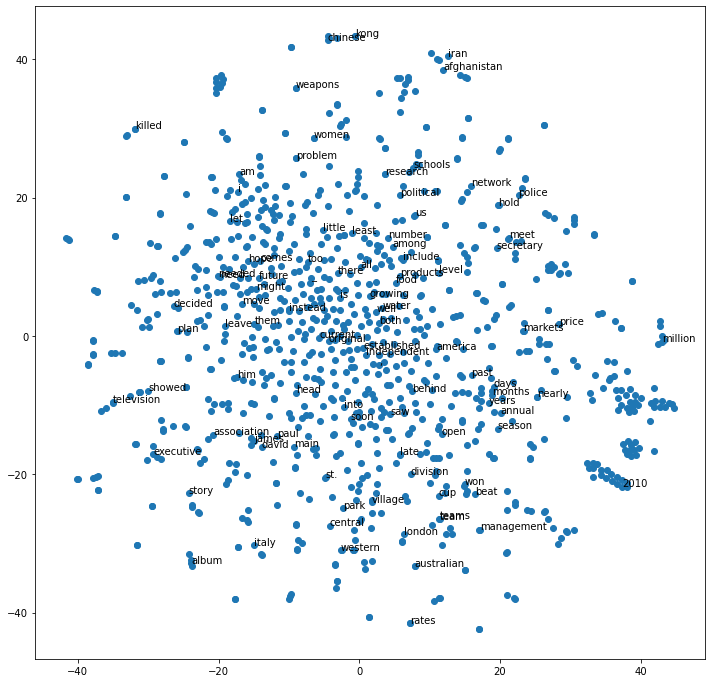

In [16]:
import matplotlib.pyplot as plt
import random

def reduce_dimensions(wv, n):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors[:n])
    labels = np.asarray(wv.index_to_key[:n]) 

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, learning_rate='auto', init='random')
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 100 data points
    random.seed(0)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

x_vals, y_vals, labels = reduce_dimensions(wv, 1000)
plot_with_matplotlib(x_vals, y_vals, labels)

[Q7] Implémenter la visualisation grâce à la méthode [MDS](https://andrewirwin.github.io/data-visualization/mds.html), puis avec la méthode [PCA](https://andrewirwin.github.io/data-visualization/pca.html). Quelles sont vos remarques entre les trois visualisations?

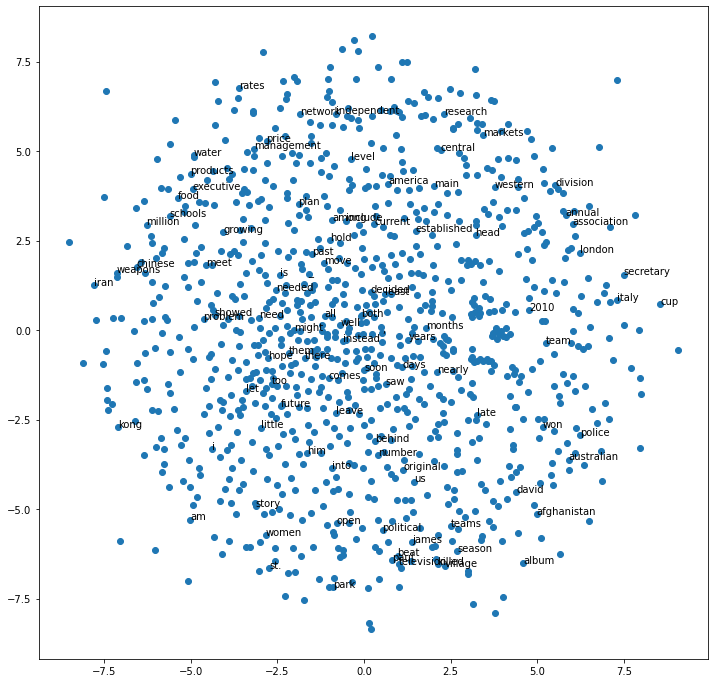

In [26]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import random

def reduce_dimensions(wv, n):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors[:n])
    labels = np.asarray(wv.index_to_key[:n]) 

    # reduce using MDS
    mds = MDS(n_components=num_dimensions, normalized_stress='auto')
    vectors = mds.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 100 data points
    random.seed(0)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

x_vals, y_vals, labels = reduce_dimensions(wv, 1000)
plot_with_matplotlib(x_vals, y_vals, labels)

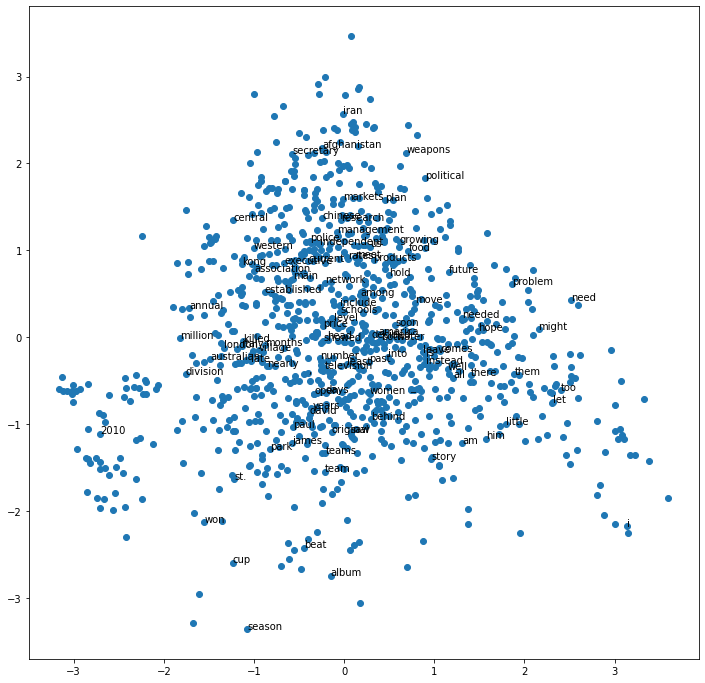

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import random

def reduce_dimensions(wv, n):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors[:n])
    labels = np.asarray(wv.index_to_key[:n]) 

    # reduce using PCA
    pca = PCA(n_components=num_dimensions)
    vectors = pca.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 100 data points
    random.seed(0)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

x_vals, y_vals, labels = reduce_dimensions(wv, 1000)
plot_with_matplotlib(x_vals, y_vals, labels)

4 - PROJET : Réécrire un texte à partir de tranformations basées sur les plongements lexicaux 
------

[Projet Q1] Réécrire un texte donné en anglais de sorte à ce que chaque substantif du texte soit remplacé par le Kème mot le plus proche dans le plongement lexical. Vous générerez le nuage de mots correspondant à partir du texte réécrit.

In [7]:
import gensim
from gensim import corpora
import gensim.downloader as api
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from nltk.corpus import stopwords
import nltk
from pprint import pprint
wv = api.load('glove-wiki-gigaword-300')

In [20]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

original_text = ""
text_path = "gender-en.txt"

with open(text_path, encoding='utf-8') as f:
    original_text = f.read()

doc = nlp(original_text)

/home/messili231/.local/lib/python3.10/site-packages/thinc/layers/layernorm.py:25: RuntimeWarning: divide by zero encountered in power
  Xhat = (X - mu) * var ** (-1.0 / 2.0)


In [21]:
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
                 for token in sent]))

0	Gender	gender	NOUN	Number=Sing	1	compound		O
1	stereotype	stereotype	NOUN	Number=Sing	2	compound		O
2	theory	theory	NOUN	Number=Sing	2	ROOT		O
3	suggests	suggest	VERB	Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	3	ROOT		O
4	that	that	SYM		4	ROOT		O
5	men	men	SYM		5	ROOT		O
6	are	are	SYM		6	ROOT		O
7	generally	generally	SYM		7	ROOT		O
8	perceived	perceived	SYM		8	ROOT		O
9	as	as	SYM		9	ROOT		O
10	more	more	SYM		10	ROOT		O
11	masculine	masculine	SYM		11	ROOT		O
12	than	than	SYM		12	ROOT		O
13	women	women	SYM		13	ROOT		O
14	,	,	SYM		14	ROOT		O
15	whereas	whereas	SYM		15	ROOT		O
16	women	women	SYM		16	ROOT		O
17	are	are	SYM		17	ROOT		O
18	generally	generally	SYM		18	ROOT		O
19	perceived	perceived	SYM		19	ROOT		O
20	as	as	ADP		20	ROOT		O
21	more	more	ADV	Degree=Cmp	22	advmod		O
22	feminine	feminine	ADJ	Degree=Pos	20	amod		O
23	than	than	ADP		22	prep		O
24	men	man	NOUN	Number=Plur	23	pobj		O
25	.	.	PUNCT	PunctType=Peri	20	punct		O
26	Several	several	ADJ	Degree=Pos	27	amod		O
27	scales	scal

In [23]:
k = 1 
new_tokens = []
change_words = []
allowed_pos = {"NOUN", "PROPN"}

for token in doc:
    if not token.is_stop and not token.is_punct and (token.pos_ in allowed_pos):
        if token.text.lower() in wv.key_to_index:
            most_similar_words  = wv.most_similar(positive=[token.text.lower()], topn=k)
            
            if len(most_similar_words) != 0:
                kth_closest_word = most_similar_words[k-1]
                new_tokens.append(kth_closest_word[0])
                change_words.append(kth_closest_word[0])
                print(f"\033[1;31m{kth_closest_word[0]}\033[0m - \033[1;32m{token.text}\033[0m")
            else:
                new_tokens.append(token.text)
                print(token.text)
            
        else:
                new_tokens.append(token.text)
                print(token.text)
    else:
        new_tokens.append(token.text)
        print(token.text)

    
##modified_doc = nlp(" ".join(new_tokens))



racial - Gender
stereotypes - stereotype
theories - theory
suggests
that
men
are
generally
perceived
as
more
masculine
than
women
,
whereas
women
are
generally
perceived
as
more
feminine
than
women - men
.
Several
dorsal - scales
have
been
developed
to
measure
fundamental
aspect - aspects
of
racial - gender
stereotype - stereotypes
(
e.g.
,
agencies - agency
and
anglican - communion
,
competency - competence
and
warm - warmth
,
or
nzaid - instrumentality
and
expressiveness - expressivity
)
.
Although
omitted
in
later
versions - version
,
senhor - Bem
's
original
sexual - Sex
roles - Role
inventories - Inventory
included
the
item - items
“
masculine
”
and
“
feminine
”
in
include - addition
to
more
specific
racial - gender
-
stereotypical
attribute - attributes
.
We
argue
that
it
is
useful
to
be
able
to
measure
these
two
focus - core
concept - concepts
in
a
reliable
,
valid
,
and
parsimonious
what - way
.
We
introduce
a
new
and
brief
magnitude - scale
,
the
tradition - Traditional
femini

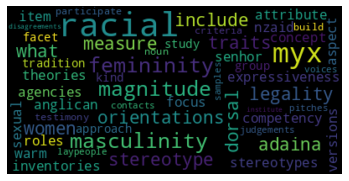

In [24]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

new_doc = nlp(" ".join(change_words))
most_list = Counter(token.text for token in new_doc if "\n" not in token.text)

def generate_wordcloud(most_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(most_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

generate_wordcloud(most_list)

In [28]:
new_tokens = []
change_words = []
allowed_pos = {"NOUN", "PROPN", "ADJ"}

for token in doc:
    if not token.is_stop and not token.is_punct and (token.pos_ in allowed_pos):
        if token.text.lower() in wv.key_to_index:
            most_similar_words  = wv.most_similar(positive=['she', token.text.lower()], negative=['he'])
            
            if len(most_similar_words) != 0:
                new_tokens.append(most_similar_words[0][0])
                change_words.append(most_similar_words[0][0])
                print(f"\033[1;31m{most_similar_words[0][0]}\033[0m - \033[1;32m{token.text}\033[0m")
            else:
                new_tokens.append(token.text)
                print(token.text)
            
        else:
                new_tokens.append(token.text)
                print(token.text)
    else:
        new_tokens.append(token.text)
        print(token.text)

women - Gender
stereotypes - stereotype
theories - theory
suggests
that
men
are
generally
perceived
as
more
masculine
than
women
,
whereas
women
are
generally
perceived
as
more
masculine - feminine
than
women - men
.
Several
dorsal - scales
have
been
developed
to
measure
basic - fundamental
aspect - aspects
of
women - gender
stereotype - stereotypes
(
e.g.
,
agencies - agency
and
eucharist - communion
,
competency - competence
and
affection - warmth
,
or
nymphomania - instrumentality
and
expressiveness - expressivity
)
.
Although
omitted
in
her - later
versions - version
,
marcela - Bem
's
version - original
sexual - Sex
roles - Role
inventories - Inventory
included
the
item - items
“
feminine - masculine
”
and
“
masculine - feminine
”
in
include - addition
to
more
particular - specific
women - gender
-
stereotype - stereotypical
attribute - attributes
.
We
argue
that
it
is
helpful - useful
to
be
can - able
to
measure
these
two
component - core
concept - concepts
in
a
dependable - reli

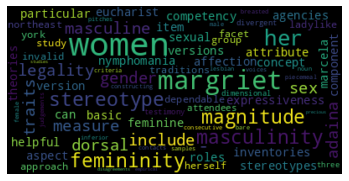

In [29]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

new_doc = nlp(" ".join(change_words))
most_list = Counter(token.text for token in new_doc if "\n" not in token.text)

def generate_wordcloud(most_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(most_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

generate_wordcloud(most_list)

5 - PROJET : Redéfinir l'algorithme Lesk
------

[Projet Q3] L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Ainsi il retourne le sens correspondant à un mot dans un contexte donné. La fonction OVERLAP implémentée dans l'algorithme Lesk permet de choisir le meilleur sens en fonction du cardinal de l'intersection des mots entre la définition du sens et le contexte textuel. 

Ici, vous proposerez de faire cette sélection à partir d'une représentation sémantique continue des phrases. Chaque phrase devra être donc représentée par un vecteur sémantique. Vous pourrez utiliser le vecteur moyen de tous les mots dans une phrase (average pooling) ou des techniques plus abouties comme celle proposé par [(Hovy, 2025)](https://aclanthology.org/P15-1073.pdf). Le sens d'un mot dans son contexte sera donc celui qui maximise la similarité entre la représentation sémantique de la définition et celle du contexte.

In [18]:
synset = wn.synsets("happy")
print(synset[0].definition())

enjoying or showing or marked by joy or pleasure


In [21]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet as wn

def average_pooling(sentence, word_vectors):
    words = sentence.split()
    vectors = [word_vectors[word] for word in words if word in word_vectors]

    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return None

def lesk_algorithm(context_sentence, word, word_vectors):
    context_vector = average_pooling(context_sentence, word_vectors)

    if context_vector is None:
        return None

    synsets = wn.synsets(word)
    max_similarity = -1
    best_sense = None

    for synset in synsets:
        definition = " ".join(synset.definition().split())  # Remove extra spaces in definitions
        definition_vector = average_pooling(definition, word_vectors)

        if definition_vector is not None:
            similarity = cosine_similarity([context_vector], [definition_vector])[0][0]

            if similarity > max_similarity:
                max_similarity = similarity
                best_sense = synset

    return best_sense

pos_to_wn = {'NOUN': wn.NOUN,
             'VERB': wn.VERB,
             'ADJ': wn.ADJ,
             'ADV': wn.ADV,
             'PROPN': wn.NOUN}

similar_words = []

for context_sent in doc.sents:  
    for token in context_sent:
        if token.pos_ in pos_to_wn:
            context_sentence = context_sent.text
            result = lesk_algorithm(context_sentence, token.text, wv)
            if result is not None:
                similar = str(result.name())
                split_word = similar.split('.')
                similar = split_word[0]
                similar_words.append(similar)
                print(f"\033[1;31m{similar}\033[0m - \033[1;32m{token.text}\033[0m")


gender - Gender
pigeonhole - stereotype
hypothesis - theory
suggest - suggests
man - men
generally - generally
perceive - perceived
more - more
masculine - masculine
woman - women
woman - women
generally - generally
perceive - perceived
more - more
feminine - feminine
man - men
several - Several
scale - scales
grow - developed
measurement - measure
fundamental - fundamental
aspect - aspects
sex - gender
pigeonhole - stereotypes
for_example - e.g.
agency - agency
communion - communion
competence - competence
affectionateness - warmth
instrumentality - instrumentality
exclude - omitted
late - later
version - version
original - original
sex - Sex
function - Role
inventory - Inventory
include - included
item - items
masculine - masculine
feminine - feminine
addition - addition
more - more
particular - specific
gender - gender
stereotyped - stereotypical
assign - attributes
argue - argue
useful - useful
able - able
standard - measure
kernel - core
concept - concepts
authentic - reliable
val

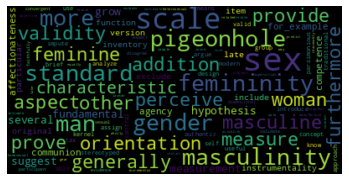

In [23]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

new_similar_doc = nlp(" ".join(similar_words))
new_similar = Counter(token.text for token in new_similar_doc if "\n" not in token.text)

def generate_wordcloud(most_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(most_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

generate_wordcloud(new_similar)

6 - PROJET MAISON  (A RENDRE UNE SEMAINE AVANT L'EXAMEN TERMINAL)
------

Vous devrez proposer une méthode originale de réécriture créative de texte dans la veine d\'OULIPO qui combine à la fois la ressource lexicale wordnet et les plongements lexicaux. Vous pourrez vous inspirer des nombreuses propostions [OULIPO](https://www.oulipo.net/). Vous pourrez bien entendu inclure tous les concepts abordés pendant les cours théoriques, comme par exemple les entités nommées et les unités polylexicales. Une mention spéciale vous sera accordée si vous travailer sur le Français ou toute autre langue que l'anglais. Dans ce cas, vous aurez besopin d'un moteur de traduction pour accéder aux définitions de wordnet. Vous trouverez des traducteurs [ICI](https://pypi.org/project/translators/). Pour les plongements lexicaux, vous aurez accès aux plongements multilingues de Fasttext [ICI](https://fasttext.cc/docs/en/crawl-vectors.html). 

Bon courage et bonne créativité ;)

In [3]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_lg")

original_text = ""
text_path = "myText.txt"

with open(text_path, encoding='utf-8') as f:
    original_text = f.read()

doc = nlp(original_text)

In [11]:
import spacy
from spacy import displacy
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet as wn
import re
from translate import Translator


def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

pos_sub= {'NOUN': wn.NOUN, 'PROPN': wn.NOUN}
pos_adj= {'ADJ': wn.ADJ}

translator= Translator(to_lang="fr")

for context_sent in doc.sents:  
    for token in context_sent:
        if token.pos_ in pos_sub:
            context_sentence = context_sent.text
            ambiguous_word = token.text
            sense = lesk(context_sentence, ambiguous_word, pos = 'n')
            if sense:
                
                word_def = sense.definition()
                split_def = re.split(r'\s|[^a-zA-Z0-9]', word_def)
                split_def = list(filter(None, split_def))
                
                best_similar = 0
                similar_word = ""
                
                for word in split_def:
                    if word in wv.key_to_index:
                        if wv.similarity(token.text.lower(),word.lower()) > best_similar:
                            best_similar = wv.similarity(token.text.lower(),word.lower())
                            similar_word = word
                            
                print(f"\033[1;31m{similar_word}\033[0m - \033[1;32m{token.text}\033[0m")
            else:
                print(token.text)
        else:
            if token.pos_ in pos_adj:
                translation = translator.translate(token.text)
                print(f"\033[1;34m{translation}\033[0m - \033[1;32m{token.text}\033[0m")
            else:
                print(token.text)
            

In
the
fabric - tapestry
of
planétaire - global
anxiety - concerns
,
faible - few
the - issues
resonate
as
profoundly
as
the
state - state
of
our
area - environment
.
As
we
navigate
the
intricate - complexities
of
the
21 - 21st
period - century
,
the
délicat - delicate
shape - balance
between
Humain - human
forward - progress
and
écologique - ecological
process - preservation
takes
Centre - center
four - stage
.
The
to - call
for
durable - sustainable
profession - practices
echoes
through
the
passageway - corridors
of
cognitive - consciousness
,
urging
us
to
reimagine
our
between - relationship
with
the
person - planet
.



At
the
hearts - heart
of
the
problem - matter
lies
the
ever
-
growing
haunting - specter
of
prevailing - climate
that - change
.
The
rises - rise
in
plants - greenhouse
fuel - gas
water - emissions
,
primarily
from
Humain - human
nature - activities
,
has
cast
a
spy - shadow
over
the
earth - Earth
's
délicat - delicate
organisms - ecosystems
.
Extreme - Extreme
cond